# Assignment 1: K-Means Clustering

Import the usual modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read the file into a Pandas DataFrame. NOTE: this file is not comma separated, but rather the columns are separated by white spaces. You can specify this using the delimiter argument.

In [3]:
data=pd.read_csv('clusters.csv',delimiter=' ')
data.head()

,X1,X2,Cluster
0,-2.758316,2.758080,1.0
1,-2.753905,2.748445,1.0
2,-2.765248,2.861683,1.0
3,-2.767955,2.759629,1.0
4,-2.746284,2.640893,1.0


Basic information of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X1       1700 non-null   float64
 1   X2       1700 non-null   float64
 2   Cluster  1700 non-null   float64
dtypes: float64(3)
memory usage: 40.0 KB


Since we only have two variables we can visualize their behavior with a scatter plot

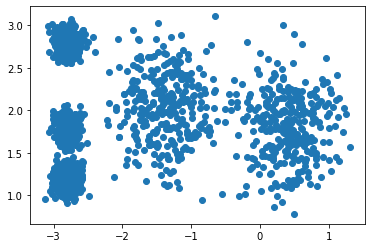

In [4]:
plt.scatter(data['X1'],data['X2'])

We can extract the two variables from the DataFrame into a numpy array

In [5]:
X=data[['X1','X2']].values
X.shape

(1700, 2)

Assignment 1A: Using the KMeans class from sklearn.cluster perform k-means clustering with a number of clusters that vary from 2 to 10. 

In [6]:
from sklearn.cluster import KMeans
k=7
kmeans = KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(X)

In the following we will plot the scatter plot together with the position of the centroids and the decision boundaries. In order to visualize the decision boundaries, we divide the space into a regular structured grid along the two variables. We then predict the cluster for each pair of coordinates and use the contourf() function of pyplot to visualize different clusters on the plane with different colors.

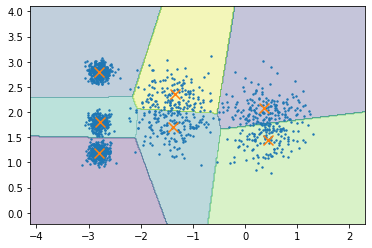

In [10]:
resolution=0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
z = kmeans.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx2, z, alpha=0.3)
plt.scatter(X[:,0],X[:,1],s=2)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker='x')

Assignment 1B: plot the inertia of the clusters as a function of the number of clusters

Assignment 1C: using the silhouette_score() function from the sklearn.metrics module, compute hte silhouette score of the clustering algorithm as a function of the number of cluster. Plot the results and determine the best clustering model for the given dataset.

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.5972444405787166